In [4]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
plt.rc('font', size=10)
warnings.filterwarnings('ignore')
import seaborn as sns
from us_state_abbrev import abbrev_to_us_state, us_state_to_abbrev
sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(11,8)}, font_scale=1.5)

In [5]:
_DATA_DIR = './data'

In [7]:
# Getting Vax time series
vaxTSD = pd.read_csv('%s/data_county_timeseries.csv'%(_DATA_DIR), index_col = 0)

In [8]:
# Vax time series date with W-Y labels
vaxTSD['W-Y'] = vaxTSD.WEEK.map(str) + "-" + vaxTSD.YEAR.map(str)
dates = vaxTSD.YEAR*100+vaxTSD.WEEK
vaxTSD['date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')

In [9]:
# Getting Covid Total Cases time series

tsd = pd.read_csv('%s/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'%(_DATA_DIR), index_col = 0)
tsd = tsd.reset_index(drop=True)
tsd = tsd.drop(['Lat', 'Long'], axis=1)

In [10]:
df = pd.DataFrame()
dfN = pd.DataFrame()
df['CASES'] = vaxTSD.groupby(['WEEK', 'YEAR', 'W-Y', 'STATE', 'CASE_TYPE'])['CASES'].sum()
dfN['CASES'] = vaxTSD.groupby(['WEEK', 'YEAR', 'W-Y', 'CASE_TYPE'])['CASES'].sum()
dfN = dfN.reset_index()
dfN = dfN.sort_values(by = ['YEAR', 'WEEK'], ascending = [True, True])
dfN.head(10)
dates = dfN.YEAR*100+dfN.WEEK
dfN['date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')

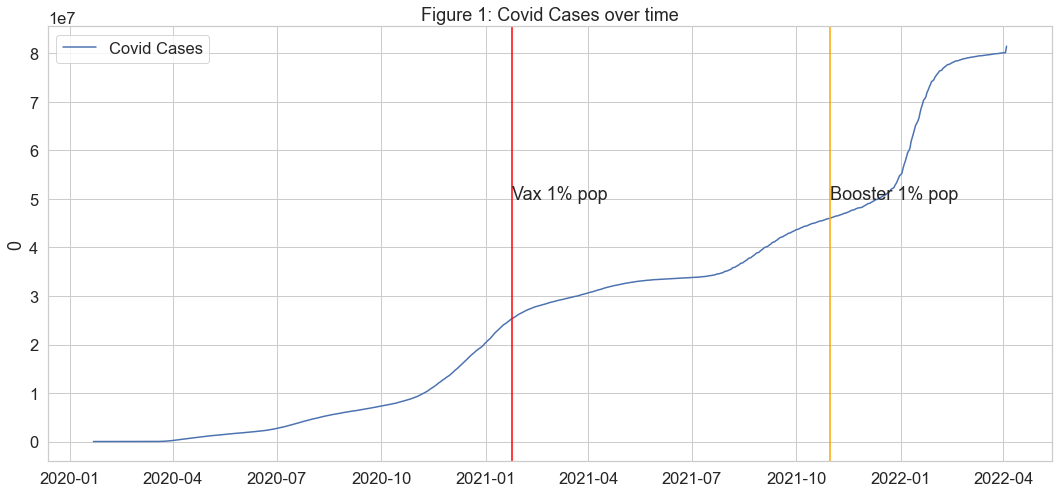

In [11]:
# Total Cases Total
fig, ax = plt.subplots(figsize=(18,8))
usData=tsd[tsd['Country/Region']=='US']
usData=usData.drop('Country/Region', axis=1)
usData= usData.reset_index(drop=True)
dates_list = [dt.datetime.strptime(date, '%m/%d/%y').date() for date in usData.columns.values]
dates_list = np.array(dates_list)
plot = sns.lineplot(x = dates_list, y=usData.iloc[0], label="Covid Cases")
# plt.vlines(dt.datetime(2021, 1, 10), 80000000, 80000000,color="red", linestyles ="dashed",lw = 3)
plot = plt.axvline(dt.datetime(2021, 1, 24), color="red")
plot = plt.text(dt.datetime(2021, 1, 24),5e7,'Vax 1% pop',rotation=0)
plot = plt.axvline(dt.datetime(2021, 10, 31), color="orange")
plot = plt.text(dt.datetime(2021, 10, 31),5e7,'Booster 1% pop',rotation=0)
plt.title('Figure 1: Covid Cases over time')
plt.savefig('figures/figure1.png')

Figure 1 shows the timeseries of people getting vaccinated. Partial means they recieved one half of the vaccination for a 2 shot vaccination. You can see that there are not many people who do not get both shots, after they get the first, and follow a same growth pattern.

Also, we see where the redline starts on 2021, 1, 10, the earliest of our data. We also see the yellow line at 2021-10-03 

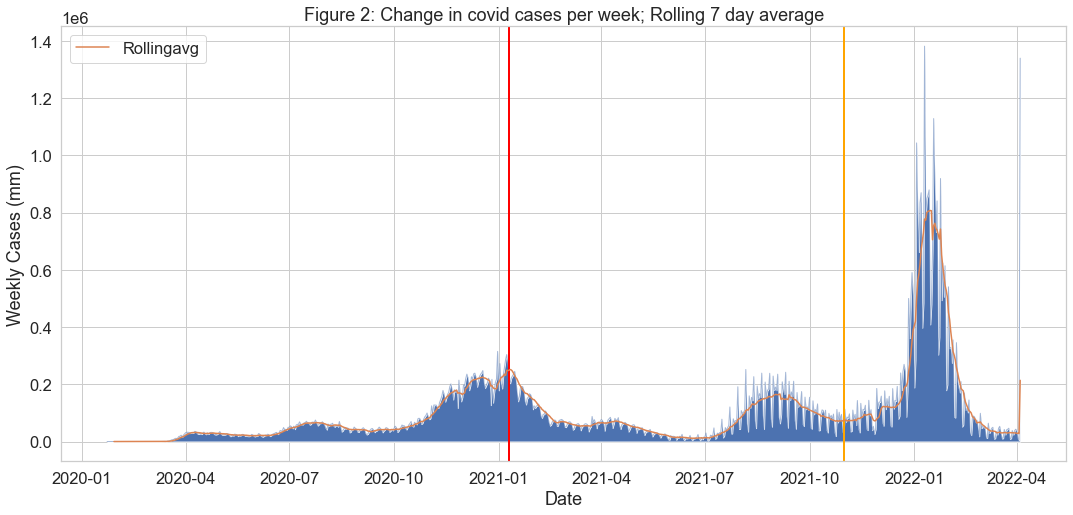

In [12]:
# Change per week of covid cases in US
data = pd.DataFrame()
data['weeklyCases'] = np.diff(usData.iloc[0]) / 1
data['x_p'] = 1
data['7week_rolling_avg'] = data.weeklyCases.rolling(7).mean()
dates_cases_week = [dt.datetime.strptime(date, '%m/%d/%y').date() for date in usData.columns.values[1:]]
dates_cases_week = np.array(dates_list)
fig, ax = plt.subplots(figsize=(18,8))
plt.plot(dates_cases_week[1:], data['weeklyCases'],lw=1, alpha=0.5)
plt.fill_between(dates_cases_week[1:], data['weeklyCases'])
plt.axvline(dt.datetime(2021, 1, 10), color="red", lw=2)
plt.axvline(dt.datetime(2021, 10, 31), color="orange", lw=2)
data = data.drop(['x_p'], axis=1)
sns.lineplot(x=dates_cases_week[1:], y=data['7week_rolling_avg'],label = 'Rollingavg')

plt.title('Figure 2: Change in covid cases per week; Rolling 7 day average')
plt.xlabel('Date')
plt.ylabel('Weekly Cases (mm)')
plt.savefig('figures/figure2.png')

Figure 2 shows the weekly cases in the US. At the red line, when vaccines reach over 1% of the population in the United States, the change of cases per week starts decreasing, which shows that vaccinations is helping fight off covid. The curve had already flattened out a little coming from quarentine, which probably helped as well. The booster vaccination release did not help bring down cases as you see, after the yellow line, the cases per week are actually at a low. As you can see below in figure 3, there is not as much urgency to get the booster. In a two month time frame, the orginal vaccination had 75% more people vaccinated.

This massive spike in covid cases, in January, 2022, Omicron became prominent, and is found to be the most infectious variant. This supports omicron being extremely infectious, but also shows that a lot of people are prone to the disease still (from vaccine/immunity decreasing or variant adapted to vaccine), and a lot of people traveling as more restrictions lifted. 


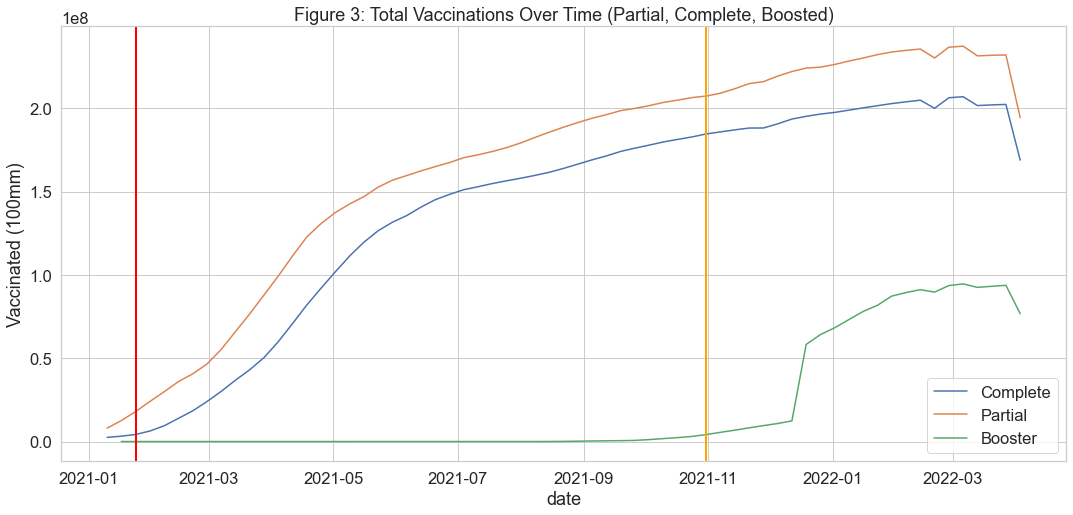

In [13]:
# Total Vaccinations in United States by week
fig, ax = plt.subplots(figsize=(18,8))
tempData = dfN.query("CASE_TYPE == 'Complete'")
sns.lineplot(data=tempData, x="date", y="CASES")
tempData = dfN.query("CASE_TYPE == 'Partial'")
sns.lineplot(data=tempData, x="date", y="CASES")
tempData = dfN.query("CASE_TYPE == 'Booster'")
plot = sns.lineplot(data=tempData, x="date", y="CASES")
plt.legend(labels=['Complete','Partial','Booster'])
plt.axvline(dt.datetime(2021, 1, 24), color="red", lw=2)
plt.axvline(dt.datetime(2021, 10, 31), color="orange", lw=2)
plt.ylabel('Vaccinated (100mm)')
plt.title('Figure 3: Total Vaccinations Over Time (Partial, Complete, Boosted)')
plt.savefig('figures/figure3.png')

In Figure 3, below, we see that not many people get the booster, until a lot of the booster growth occurs from November, 2021 to January 2021. 

Figure 2 reflects the significant rise in weekly covid vaccinations that occurred in the beginning of 2021 following emergency approval of coronavirus vaccines in December of 2020. After peaking at about 12 million vaccinations/week in 4/2021 weekly vaccinations decreased and floated around 2 million/week. So far, in the beginning of 2022, there has been significant fluctuations in weekly vaccination levels, moving from 6 million in 2/2022 to -5 million in 3/2022. You also see how the increase in weekly vaccinations reaches a max quickly, showing that everyone who really wanted to get vaccinated did, and not many other are choosing to.

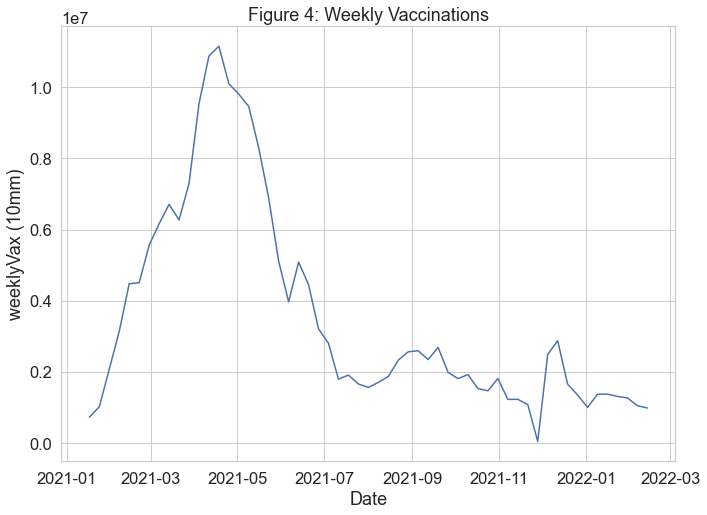

In [14]:
complete = dfN[dfN['CASE_TYPE']=='Complete']
complete=complete.iloc[:-6]
complete['weeklyVax'] = complete['CASES'].diff()
complete['date'] = complete['date'].dt.strftime('%m/%d/%Y')
complete.drop(complete.tail(1).index,inplace=True)
dates_list_c = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in complete['date']]
### title?
plt.plot(dates_list_c, complete['weeklyVax'])
plt.title('Figure 4: Weekly Vaccinations')
plt.xlabel('Date')
plt.ylabel('weeklyVax (10mm)')
plt.savefig('figures/figure4.png')

Figure 5, shows less of a drive to get the booster as it is a rapid increase and decrease, probably because a lot of the boosters came in at once, could be issue of when it was reported. But the people who wanted this vax all got it very quickly and, not many more are choosing to get it.

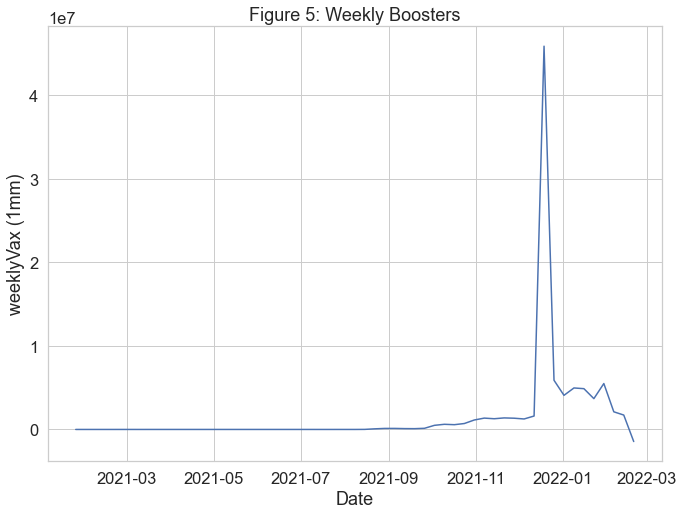

In [15]:
booster = dfN[dfN['CASE_TYPE']=='Booster']
booster['weeklyVax'] = booster['CASES'].diff()
booster = booster.iloc[:-6,:]
# booster['date'] = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in booster['date']]
plot = sns.lineplot(x=booster['date'], y=booster['weeklyVax'])
plt.title('Figure 5: Weekly Boosters')
plt.xlabel('Date')
plt.ylabel('weeklyVax (1mm)')
plt.savefig('figures/figure5.png')

In [16]:
usTSD = pd.read_csv('%s/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'%(_DATA_DIR), index_col = 0)
usTSD = usTSD.drop(['iso2','iso3','code3','FIPS', 'Admin2','Country_Region','Lat', 'Long_','Combined_Key'], axis=1)
usTSD=usTSD.groupby(['Province_State']).sum()
usTSD = usTSD.reset_index()
usTSD.rename(columns={'Province_State':'STATE'}, inplace=True)

population = pd.read_csv('%s/nst-est2019-alldata.csv'%(_DATA_DIR), index_col = 0)
population = population.drop(['REGION','DIVISION','STATE'], axis=1)
# population = population.drop(population.columns.difference(['NAME','POPESTIMATE2019']), axis=1,inplace=True)
population = population.loc[:, population.columns.intersection(['NAME','POPESTIMATE2019'])]
population.rename(columns={'NAME':'STATE', 'POPESTIMATE2019':'Population'}, inplace=True)
population = population.reset_index(drop=True)
usTSD = pd.merge(usTSD, population, on='STATE', how="left")


In [17]:
usTSD = usTSD.T
usTSD.columns = usTSD.iloc[0]
usTSD = usTSD.drop('STATE')
usTSD = usTSD.reset_index()
usTSD = usTSD.rename(columns={'index':'date'})

In [18]:
usTSD
stateCovidTotal = usTSD.iloc[-2:-1, 1:].T
stateCovidTotal = stateCovidTotal.reset_index()
stateCovidTotal = stateCovidTotal.rename(columns={803: 'TotalCases'})
pop = usTSD.iloc[-1, 1:].T.to_frame().reset_index()
pop = pop.rename(columns={804: 'Population'})
stateCovidTotal['CasesPerPerson'] = stateCovidTotal['TotalCases'] / pop['Population']

In [19]:
vax_by_state = pd.DataFrame()
vax_by_state['CASES'] = vaxTSD.groupby(['STATE_NAME', 'date', 'CASE_TYPE'])['CASES'].sum()
vax_by_state = vax_by_state.reset_index()
vax_by_state[vax_by_state['STATE_NAME']=='CA']
d1 = dt.datetime(2022, 4, 3)
per_vax = vax_by_state.loc[(vax_by_state['date'] == d1) |
                           ((vax_by_state['STATE_NAME'] =='CA') & (vax_by_state['date'] == dt.datetime(2022, 3, 27)))]
per_vax = per_vax.loc[vax_by_state['CASE_TYPE'] == 'Complete']

for ind in per_vax.index:
    temp = per_vax['STATE_NAME'][ind]
    per_vax['STATE_NAME'][ind] = abbrev_to_us_state[temp]
per_vax = per_vax.reset_index(drop=True)
per_vax = per_vax.rename(columns={"STATE_NAME": "STATE"})
per_vax = pd.merge(per_vax, population, on='STATE', how="left")
per_vax['VaxPerPerson'] = per_vax['CASES']/per_vax['Population']
vax_by_state=per_vax


In [20]:
stateCovidDataFrame = pd.merge(vax_by_state, stateCovidTotal, on='STATE', how="left")

## Cases and Deaths pre & post vax

In [21]:
# Realized I just had to do this for all the rates:
mostRecentUS = pd.read_csv('%s/csse_covid_19_daily_reports_us/04-04-2022.csv'%(_DATA_DIR), index_col = 0).reset_index()
mostRecentUS = mostRecentUS.drop(['Country_Region','Last_Update','Lat','Long_','Recovered','Active', 'Long_','People_Hospitalized','UID', 'ISO3', 'Hospitalization_Rate'], axis=1)
mostRecentUS = mostRecentUS.rename(columns={'Province_State': 'STATE'})
mostRecentUS = pd.merge(mostRecentUS, stateCovidDataFrame[['STATE','VaxPerPerson','Population']], on='STATE', how="left")
mostRecentUS['Vax_Rate'] = mostRecentUS['VaxPerPerson']*100000


## Cases and Deaths pre & post vax

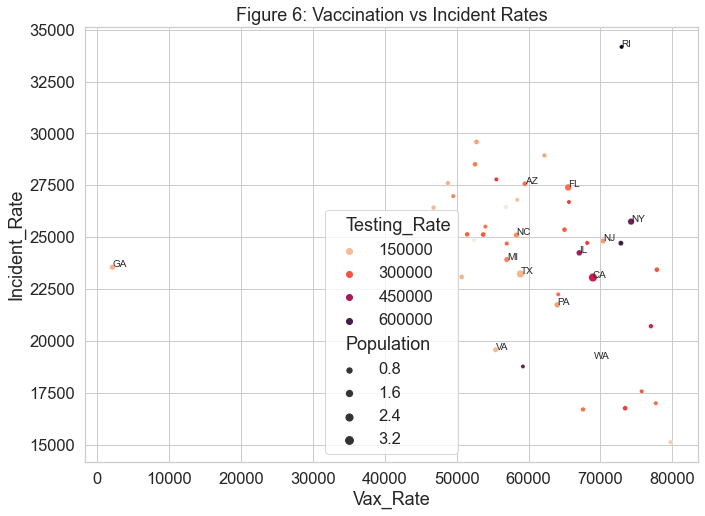

In [22]:
sns.scatterplot(data=mostRecentUS, x='Vax_Rate', y='Incident_Rate',
                size=mostRecentUS['Population'], hue = 'Testing_Rate', palette='rocket_r')
for p, s, x, y in zip(mostRecentUS.Population, mostRecentUS.STATE,
                      mostRecentUS.Incident_Rate, mostRecentUS.Vax_Rate):
    if ((p >= 6903185.0) | (s=='Rhode Island')):
        plt.annotate(us_state_to_abbrev[s], (y + 0.2, x+.2), fontsize=10)

plt.title('Figure 6: Vaccination vs Incident Rates')
plt.savefig('figures/figure6.png')

Figure 6 shows that as the vax_rate (vaccinations per 100,000 people), increases, you see a general decrease in the incident rate. It doesn't show it great as they are not very condense, as some have different testing rates, most likely causing many cases to be not counted. 

However, what we must think about that this is all the covid even before the vaccine came out. So in this next figure we see that all cases counted after 1% of the US population was vaccinated:

## When Vaccine Becomes Readily Avaliable Cases & Deaths

In [23]:
# Looking at deaths/cases after vax 
# date that vax becomes widely avaliable dt.datetime(2021, 8, 22)
vaxReleasedData = pd.read_csv('%s/csse_covid_19_daily_reports_us/08-22-2021.csv'%(_DATA_DIR), index_col = 0).reset_index()
dataPostVax = mostRecentUS.copy(deep=True)
dataPostVax['Confirmed'] = dataPostVax['Confirmed'] - vaxReleasedData['Confirmed']
dataPostVax['Deaths'] = dataPostVax['Deaths'] - vaxReleasedData['Deaths']
dataPostVax['Total_Test_Results'] = dataPostVax['Total_Test_Results'] - vaxReleasedData['Total_Test_Results']
dataPostVax['Incident_Rate'] = dataPostVax['Confirmed']/dataPostVax['Population'] * 100000
dataPostVax['Case_Fatality_Ratio'] = dataPostVax['Deaths']/dataPostVax['Population'] * 100000
dataPostVax['Testing_Rate'] = dataPostVax['Total_Test_Results']/dataPostVax['Population'] * 100000

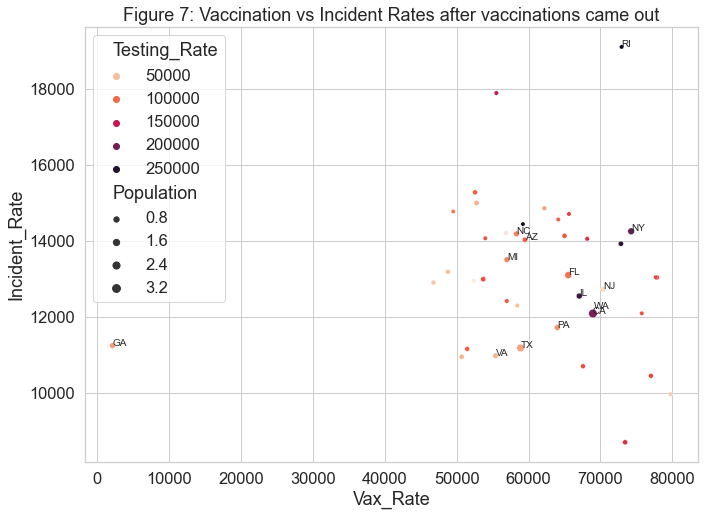

In [24]:
sns.scatterplot(data=dataPostVax, x='Vax_Rate', y='Incident_Rate',
                size=dataPostVax['Population'], hue = 'Testing_Rate', palette='rocket_r')
for p, s, x, y in zip(dataPostVax.Population, dataPostVax.STATE,
                      dataPostVax.Incident_Rate, dataPostVax.Vax_Rate):
    if ((p >= 6903185.0) | (s=='Rhode Island')):
        plt.annotate(us_state_to_abbrev[s], (y + 0.2, x+.2), fontsize=10)

plt.title('Figure 7: Vaccination vs Incident Rates after vaccinations came out')
plt.savefig('figures/figure7.png')

Figure 7: We see more of a trend than the previous graph, showing vaccinations do have a correlation to vaccination rates. In addition, a lot of the dark color states show a good trend of incident rates decreasing as vaccination rates increase (NC,AX,FL,IL,WA,CA). An outlier here like New York city, high vaccine rate, high testing rate, and high incident rate. This is probably the way New York is structed, many people in a condensed area, and potentially interacting many more people.

Figure 8: We are looking at death to vaccination ratio, to see if vaccinations help lower the amount of deaths. Here we are looking at the total death fatality from all of covid, and we do not see much of a trend. (go to next figure)

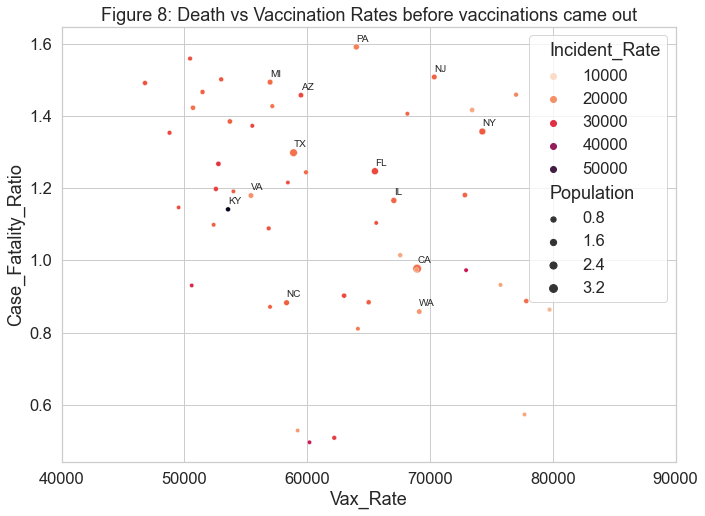

In [25]:
plot = sns.scatterplot(data=mostRecentUS, x='Vax_Rate', y='Case_Fatality_Ratio',
                size=mostRecentUS['Population'], hue = 'Incident_Rate', palette='rocket_r' )
for p, s, y, x in zip(mostRecentUS.Population, mostRecentUS.STATE,
                      mostRecentUS.Case_Fatality_Ratio, dataPostVax.Vax_Rate):
    if ((p >= 6903185.0) | (s=='Kentucky')):
        plt.annotate(us_state_to_abbrev[s], (x+.015, y + 0.015), fontsize=10)
plot.set_xlim(40000, 90000)
plt.title('Figure 8: Death vs Vaccination Rates before vaccinations came out')
plt.savefig('figures/figure8.png')

In [26]:
# Looking at deaths/cases after vax 
# date that vax becomes widely avaliable dt.datetime(2021, 8, 22)
vaxReleasedData = pd.read_csv('%s/csse_covid_19_daily_reports_us/08-22-2021.csv'%(_DATA_DIR), index_col = 0).reset_index()
dataPostVax = mostRecentUS.copy(deep=True)
dataPostVax['Confirmed'] = dataPostVax['Confirmed'] - vaxReleasedData['Confirmed']
dataPostVax['Deaths'] = dataPostVax['Deaths'] - vaxReleasedData['Deaths']
dataPostVax['Total_Test_Results'] = dataPostVax['Total_Test_Results'] - vaxReleasedData['Total_Test_Results']
dataPostVax['Incident_Rate'] = dataPostVax['Confirmed']/dataPostVax['Population'] * 100000
dataPostVax['Case_Fatality_Ratio'] = dataPostVax['Deaths']/dataPostVax['Population'] * 100000
dataPostVax['Testing_Rate'] = dataPostVax['Total_Test_Results']/dataPostVax['Population'] * 100000

Figure 9: Looking at only the death ratio after vaccines came out, allows us to see if vaccinations helped prevent deaths. Looking at it, there is definitely a general trend of having a high vaccination rate lowers deaths.

,STATE,Confirmed,Deaths,FIPS,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,VaxPerPerson,Population,Vax_Rate
21,Kentucky,2092263,22515,21.0,46831.157965,NaN,503.953624,NaN,0.535488,4467673.0,53548.838512


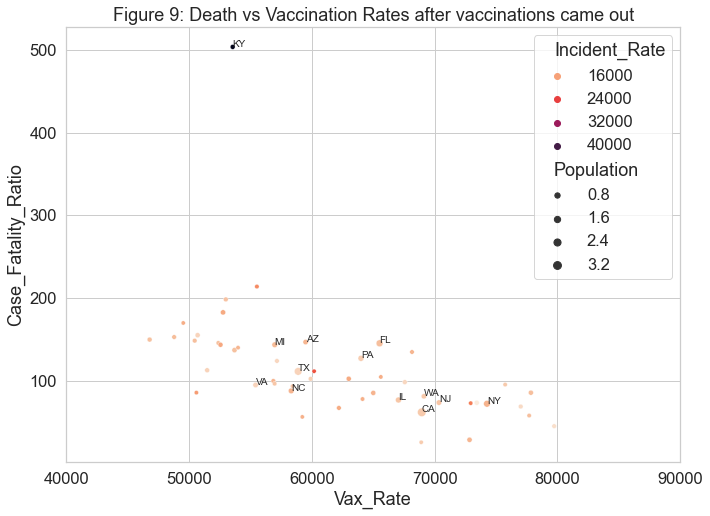

In [27]:
plot = sns.scatterplot(data=dataPostVax, x='Vax_Rate', y='Case_Fatality_Ratio',
                size=dataPostVax['Population'], hue = 'Incident_Rate', palette='rocket_r' )
for p, s, y, x in zip(dataPostVax.Population, dataPostVax.STATE,
                      dataPostVax.Case_Fatality_Ratio, dataPostVax.Vax_Rate):
    if ((p >= 6903185.0) | (s=='Kentucky')):
        plt.annotate(us_state_to_abbrev[s], (x+.2, y + 0.2), fontsize=10)
plot.set_xlim(40000, 90000)
plt.title('Figure 9: Death vs Vaccination Rates after vaccinations came out')
plt.savefig('figures/figure9.png')
dataPostVax[dataPostVax['Case_Fatality_Ratio']>400]